In [0]:
from keras.applications.vgg19 import VGG19
from keras.models import Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [0]:
classes = ['Acne and Rosacea Photos',
           'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Eczema Photos',
           'Melanoma Skin Cancer Nevi and Moles',
           'Psoriasis pictures Lichen Planus and related diseases', 
           'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 
           'Nail Fungus and other Nail Disease']

base_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))

for layer in base_model.layers[:-5]:
  layer.trainable = False

output = base_model.output
x = GlobalAveragePooling2D()(output)
x = Dense(1024, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 7s 0us/step


Found 7644 images belonging to 8 classes.
Found 2016 images belonging to 8 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
124/124 [==============================] - 75s 603ms/step - loss: 1.9062 - acc: 0.2170 - val_loss: 1.7612 - val_acc: 0.2932

Epoch 00001: val_loss improved from inf to 1.76121, saving model to vgg19_20epochs.h5
Epoch 2/20
124/124 [==============================] - 68s 550ms/step - loss: 1.6878 - acc: 0.3300 - val_loss: 1.6413 - val_acc: 0.3403

Epoch 00002: val_loss improved from 1.76121 to 1.64125, saving model to vgg19_20epochs.h5
Epoch 3/20
124/124 [==============================] - 69s 554ms/step - loss: 1.5909 - acc: 0.3873 - val_loss: 1.6172 - val_acc: 0.3690

Epoch 00003: val_loss improved from 1.64125 to 1.61719, saving model to vgg19_20epochs.h5
Epoch 4/20
124/124 [==============================] - 69s 555ms/step - loss: 1.5206 - acc: 0.4168 - val_loss: 1.5403 - val_acc: 0.4246

Epoch 00004: val_loss improved from 1.61719 to 1.54034, sa

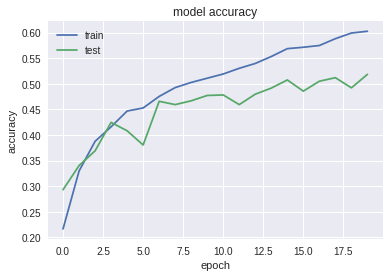

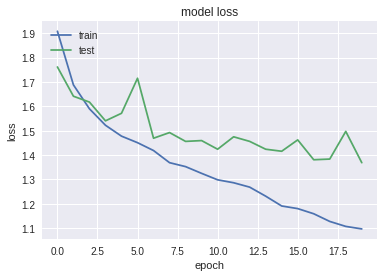

In [0]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=5)

model_chkpt = ModelCheckpoint('vgg19_20epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 23
nb_epoch = 20
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='/content/train'
test_path='/content/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=62)


# model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
# # model.summary()
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=20,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1920epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
124/124 [==============================] - 75s 602ms/step - loss: 1.0736 - acc: 0.6140 - val_loss: 1.4131 - val_acc: 0.5045

Epoch 00001: val_loss did not improve from 1.36873
Epoch 2/10
124/124 [==============================] - 68s 550ms/step - loss: 1.0554 - acc: 0.6161 - val_loss: 1.4715 - val_acc: 0.5025

Epoch 00002: val_loss did not improve from 1.36873
Epoch 3/10
124/124 [==============================] - 69s 557ms/step - loss: 1.0332 - acc: 0.6242 - val_loss: 1.4396 - val_acc: 0.5223

Epoch 00003: val_loss did not improve from 1.36873
Epoch 4/10
124/124 [==============================] - 68s 549ms/step - loss: 1.0105 - acc: 0.6375 - val_loss: 1.3889 - val_acc: 0.5332

Epoch 00004: val_loss did not improve from 1.36873
Epoch 5/10
124/124 [==============================] - 69s 556ms/step - loss: 0.9898 - acc: 0.6454 - val_loss: 1.3781 - val_acc: 0.5248

Epoch 00005: val_loss did not improve from 1.36873
Epoch 6/10
124/124 [==============================] - 69s 556ms/s

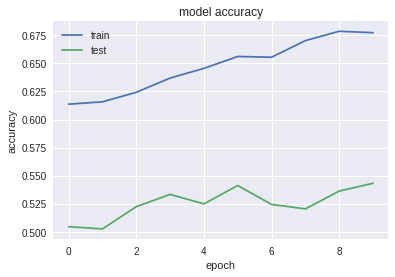

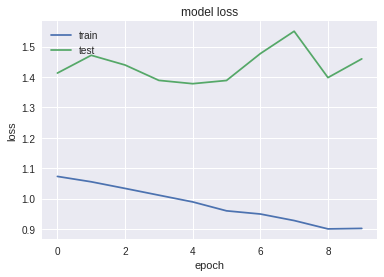

In [0]:
model = load_model('final_vgg1920epochs.h5', compile='True')
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=10,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_vgg1930epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model = load_model('final_vgg1920epochs.h5', compile=True)

In [0]:
import cv2
img = 'test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-keratosis-5FU-13.jpg'
img = cv2.resize(cv2.imread(img), (32,32)) / 255.0
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0. 1. 0. 0. 0. 0. 0. 0.]]


In [0]:
import cv2
img = 'test/Urticaria Hives/hives-Urticaria-Acute-73.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0. 0. 0. 0. 0. 0. 1. 0.]]


In [0]:
import cv2
img = 'test/Psoriasis pictures Lichen Planus and related diseases/08PsoriasisPinking1.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0.00000000e+00 0.00000000e+00 1.08993086e-35 0.00000000e+00
  2.56784800e-25 1.00000000e+00 8.33468228e-24 1.14407442e-26]]


In [0]:
import cv2
img = 'test/Nail Fungus and other Nail Disease/habit-tic-deformity-19.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
import cv2
img = 'test/Tinea Ringworm Candidiasis and other Fungal Infections/tinea-body-109.jpg'
img = cv2.resize(cv2.imread(img), (32,32))
prediction = model.predict(img.reshape(1,32,32,3))
print(prediction.argmax())

1


In [0]:
!cp "final_vgg1920epochs.h5" "/content/drive/My Drive/SkinDataset/final_vgg1920epochs.h5"

In [0]:
!cp "/content/drive/My Drive/SkinDataset/test.zip" "test.zip"